# Exploratory Data Analysis

Breve Explicação sobre notebook

## Summary??

## Import Libraries and Utilities

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
import numpy as np

In [2]:
# Import utilities
from EDA.age import calc_age
from EDA.educ import education
from EDA.data_load import data_load

## EDA

In [3]:
# Import dataset
cust_info = data_load('.\\Data\\Customer Info Dataset.csv')

In [4]:
# See dataset
cust_info.head()

,customer_id,customer_name,customer_gender,customer_birthdate,kids_home,teens_home,number_complaints,distinct_stores_visited,lifetime_spend_groceries,lifetime_spend_electronics,...,lifetime_spend_meat,lifetime_spend_fish,lifetime_spend_hygiene,lifetime_spend_videogames,lifetime_total_distinct_products,percentage_of_products_bought_promotion,year_first_transaction,loyalty_card_number,latitude,longitude
0,4239,Sara Moscowitz,female,09/10/1999 03:11 PM,0.0,0.0,0.0,2.0,91.0,20.0,...,53.0,48.0,47.0,105.0,85.0,0.192154,2017.0,NaN,38.754263,-9.163397
1,19330,Donald Robertson,male,06/26/1981 10:58 PM,1.0,0.0,0.0,2.0,197.0,5958.0,...,86.0,80.0,45.0,1964.0,85.0,0.098647,2015.0,NaN,38.777761,-9.156197
2,2272,Phd. Felicia Bradshaw,female,01/31/1987 09:08 AM,1.0,1.0,0.0,20.0,397.0,20.0,...,204.0,170.0,46.0,5.0,408.0,0.497251,2008.0,NaN,38.785329,-9.127113
3,25288,Emma Williams,female,06/17/1942 12:02 AM,3.0,4.0,1.0,2.0,5282.0,237.0,...,1081.0,1068.0,617.0,1078.0,1956.0,0.206713,2010.0,NaN,38.744086,-9.156589
4,12829,Hilda Huerta,female,01/31/2000 11:43 AM,0.0,0.0,0.0,2.0,82.0,22.0,...,39.0,39.0,48.0,103.0,83.0,0.200625,2015.0,NaN,38.756024,-9.162970


In [5]:
# Search for duplicated 'customer_id'
cust_info['customer_id'].duplicated().sum()

0

In [6]:
# Set 'customer_id' as index
cust_info = cust_info.set_index('customer_id')

In [7]:
# Search for missing data
cust_info.isna().sum()

customer_name                                  0
customer_gender                                0
customer_birthdate                             0
kids_home                                      0
teens_home                                     0
number_complaints                              0
distinct_stores_visited                        0
lifetime_spend_groceries                       0
lifetime_spend_electronics                     0
typical_hour                                   0
lifetime_spend_vegetables                      0
lifetime_spend_nonalcohol_drinks               0
lifetime_spend_alcohol_drinks                  0
lifetime_spend_meat                            0
lifetime_spend_fish                            0
lifetime_spend_hygiene                         0
lifetime_spend_videogames                      0
lifetime_total_distinct_products               0
percentage_of_products_bought_promotion        0
year_first_transaction                         0
loyalty_card_number 

In [8]:
cust_info.dtypes

customer_name                               object
customer_gender                             object
customer_birthdate                          object
kids_home                                  float64
teens_home                                 float64
number_complaints                          float64
distinct_stores_visited                    float64
lifetime_spend_groceries                   float64
lifetime_spend_electronics                 float64
typical_hour                               float64
lifetime_spend_vegetables                  float64
lifetime_spend_nonalcohol_drinks           float64
lifetime_spend_alcohol_drinks              float64
lifetime_spend_meat                        float64
lifetime_spend_fish                        float64
lifetime_spend_hygiene                     float64
lifetime_spend_videogames                  float64
lifetime_total_distinct_products           float64
percentage_of_products_bought_promotion    float64
year_first_transaction         

## Transforming variables

Date of birth to age

In [9]:
# Calculate age of each customer
calc_age(cust_info)
cust_info['age']

customer_id
4239     23
19330    41
2272     36
25288    80
12829    23
         ..
625      48
26447    37
182      22
13768    64
2570     79
Name: age, Length: 30000, dtype: int32

Level of education in the variable name

In [10]:
# See pattern in names
cust_info['customer_name'].head(20)

customer_id
4239              Sara Moscowitz
19330           Donald Robertson
2272       Phd. Felicia Bradshaw
25288              Emma Williams
12829               Hilda Huerta
12267         Bsc. Anthony Brown
10548       Phd. Kimberly Milton
11199               Robert Smith
26762               Alan Lambert
457            Msc. Pamela Moser
15901              Sabra Terrell
8267           Denise Standridge
22941                 John Abreu
2803     Bsc. Kimberly Whitehead
20623             Cedrick Villar
2345          Bsc. Henry Schultz
19722                 Ann Murphy
17585          George Degasperis
1702           Phd. Robert Pires
15914             Fannie Onisick
Name: customer_name, dtype: object

In [11]:
# See level of education of each customer
# based on their name
cust_info['education'] = cust_info['customer_name'].apply(education)
cust_info['education']

customer_id
4239       HS
19330      HS
2272     Phd.
25288      HS
12829      HS
         ... 
625      Phd.
26447      HS
182        HS
13768      HS
2570     Phd.
Name: education, Length: 30000, dtype: object

In [12]:
# Get to know the dataset
cust_info.describe().T

,count,mean,std,min,25%,50%,75%,max
kids_home,30000.0,1.146700e+00,1.234111,0.000000e+00,0.000000,1.000000,1.000000,10.000000
teens_home,30000.0,5.129333e-01,0.912502,0.000000e+00,0.000000,0.000000,1.000000,9.000000
number_complaints,30000.0,7.643667e-01,0.836341,0.000000e+00,0.000000,1.000000,1.000000,9.000000
distinct_stores_visited,30000.0,6.120767e+00,6.511410,0.000000e+00,2.000000,3.000000,8.000000,21.000000
lifetime_spend_groceries,30000.0,3.978634e+03,5280.641466,0.000000e+00,220.000000,950.000000,5253.000000,18852.000000
lifetime_spend_electronics,30000.0,9.652388e+02,1755.323397,1.058527e+00,45.000000,194.000000,721.000000,6603.000000
typical_hour,30000.0,-inf,NaN,-inf,9.000000,14.000000,20.000000,23.000000
lifetime_spend_vegetables,30000.0,5.642078e+02,481.819086,1.000000e+00,247.000000,425.000000,785.000000,1568.000000
lifetime_spend_nonalcohol_drinks,30000.0,6.287501e+02,496.346400,0.000000e+00,244.000000,425.000000,949.000000,1671.000000
lifetime_spend_alcohol_drinks,30000.0,3.793445e+02,236.206400,0.000000e+00,193.000000,419.000000,537.000000,1048.000000


In [13]:
categorical = ['customer_name']
numerical = ['kids_home', 'teens_home',
             'number_complaints', 'location_latitude',
             'location_longitude', 'distinct_stores_visited',
             'loyalty_card_number', 'lifetime_spent_groceries',
             'lifetime_spent_electronics','lifetime_spent_vegetables',
             'lifetime_spend_nonalcohol_drinks', 
             'lifetime_spend_alcohol_drinks',
             'lifetime_spent_meat', 'lifetime_spent_fish',
             'lifetime_spent_hygiene', 'lifetime_spent_videogames',
             'lifetime_total_distinct_products',
             'percentage_of_products_bought_promotion',
             'year_first_transaction', 'typical_hours',
             'latitude', 'longitude','age']

## Visualizations

In [14]:
# Change default of plot size
rcParams['figure.figsize'] = 15, 10

Relation between customers and each loyalty card

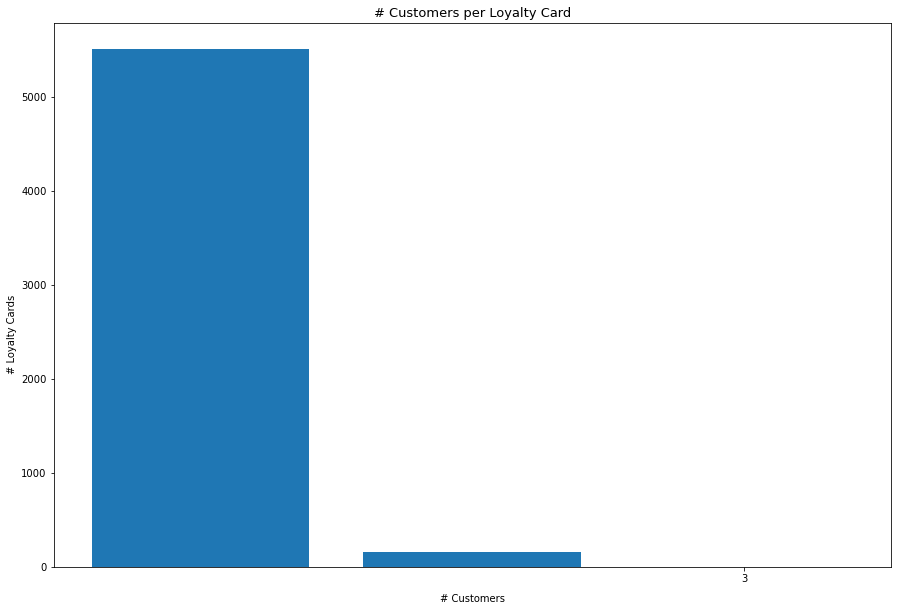

In [86]:
# Count the number of customers per loyalty card
cust_per_card = cust_info['loyalty_card_number'].value_counts()

# Get existent number of clients per loyalty card and their frequency
unique, counts = np.unique(cust_per_card.values, return_counts=True)

# Set the x-axis range and ticks
x_axis = range(min(counts), max(counts) + 1, 1)
plt.xticks(x_axis)

# Set the chart title and axis labels
plt.title('# Customers per Loyalty Card',
          fontdict={'fontsize': 13})
plt.xlabel('# Customers', labelpad=10)
plt.ylabel('# Loyalty Cards', ha='right')

# Create a bar chart using matplotlib with unique counts as x-axis and frequency as y-axis
plt.bar(unique, counts)

# Show the plot
plt.show()

# PROBLEM: doesnt show 1 or 2 in x-axis